# Solving Kepler's equation with Newton-Raphson's method.
## Kepler's equation is the following:

$$ M = E -esinE$$

## This equation has to be solved numerically. In this notebook I will solve it using Newton-Raphson's method. The *quid* of this is the following formula:


$$ x_{n+1}= x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

## In this case, I will find the root of the following equation involving Kepler's equation:
$$ g(E) = E - esinE - M $$

In [1]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt

#Now I define the function which root I am going to find
def g_E(E,params):
    M = params[0]
    e = params[1]  
    g = E - e*np.sin(E) - M
    return g

#Now its time to define its derivative with respecto to 'E'
def Dif_g(E,params):
    M = params[0]
    e = params[1]
    Dg = 1 - e*np.cos(E)
    return Dg

#Now I will give the inital value of E and some other needed values
M = np.pi/6
e = 0.5
E0 = M
error = 10
i = 1

#Now I will create the iterations
while error > 1e-10 :
    #This line is the quid of Newton-Raphson's method
    E1 = E0 - g_E(E0, [M,e])/Dif_g(E0,[M,e])
    #This line computes the error between the old and new apporximated roots
    error = np.abs(E1-E0)
    #This line re-wrties the value of the old approximation in order to do the iterations
    E0 = E1
    print("For iteration number", i,", the aproximate root is E:",E0)
    i = i + 1


For iteration number 1 , the aproximate root is E: 0.9645257607959048
For iteration number 2 , the aproximate root is E: 0.9225208202429863
For iteration number 3 , the aproximate root is E: 0.9220066807892194
For iteration number 4 , the aproximate root is E: 0.9220066053171304
For iteration number 5 , the aproximate root is E: 0.9220066053171289


## Now it's time to find $r$ and $f$. Assuming $a = 0.03 AU$:

 $$ r = 0.03[AU](1-cos(0.9220066053171289) = 0.019[AU]$$
 
 ## And:
 
 $$  f = cos^{-1} ( \frac{1}{e} (\frac{a(1-e^{2})}{r} -1) ) = 1.19 rad$$
 
 ## Let's make a RV function.
 
 $$v_{r} = v_{z} + K[ cos(\omega)cos(f) -sin(\omega)sin(f) + ecos(\omega)] $$
 
 ## We have to assume some value of $\omega$. And in order to make this last equaiton time-dependent, I have to put $f$ in terms of $M = \frac{2\pi(t-t_{0})}{T}$. I know from solving Kepler's equaiton numerically that $M = \frac{\pi}{6}$. So $ M = \frac{12(t-t_{0})}{T}$. Also, I know that:
 
 $$f = M + (2e - \frac{1}{4}e^{3})sinM + \frac{5}{4}e^{2}sin2M + \frac{13}{12}e^{3}sin3M + ... $$
 
 ## So let's do some coding.

 

Text(0.5, 1.0, 'RV plot with e = 0.001')

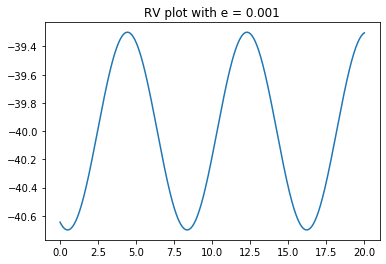

In [8]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Now I write first the function that compute the true anomaly f:
#t0 -> time of passage of periastron
#M  -> Mean anomaly
#f  -> True anomally
#e  -> Excentricity 
def true_f(t,params):
    t0 = params[0]
    M  = params[1]
    #This line takes into account the first 4 terms of the Fourier's expansion of "f"
    f  = M + (2*(e) - (e**3)/4)*np.sin(M) + (5/4)*(e**2)*np.sin(2*M) + (13/12)*(e**3)*np.sin(3*M)
    return f

#Now I give some values for the time and for the params:
t  = np.arange(0,20,0.001) #with a point in the plot every 0.001 days
t0 = 13 #days
M = 12*(t-t0)/T # radians


#I write now the RV function:
#K  -> Doppler semi amplitude
#vZ -> Proper motion of the barycenter (or star's systemic velocity)
#w  -> argument of periapsis
#T  -> Orbital period

def calcula_RV(f,parametros):
    vz = parametros[0]
    K  = parametros[1]
    T  = parametros[2]
    w  = parametros[3]
    e  = parametros[4]
    vr = vz + K*(np.cos(w)*np.cos(f) - np.sin(w)*np.sin(f) + e*np.cos(w))
    return vr


#Now I give some values to all the parameters:
vz = -40 #km/s
K  = 0.7 #km/s
T  = 15   #days
w  = 0.5756  #radians (33°)
e  = 0.001

#Now I call first the function that computes the true anomaly:
f = true_f(t,[t0,M])

#Now I call the RV function:
vr = calcula_RV(f, [vz,K,T,w,e])

#Now I plot RV as a function of time
plt.plot(t,vr)
plt.title('RV plot with e = 0.001')



## Now I change the eccentricity to $e = 0.5$

Text(0.5, 1.0, 'RV plot with e = 0.5')

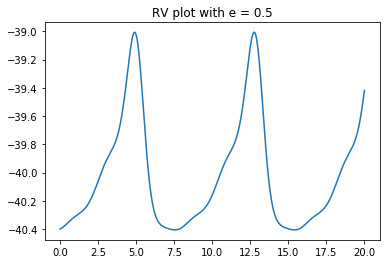

In [5]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Now I write first the function that compute the true anomaly f:
#f  -> True anomally
#e  -> Excentricity 
def true_f(t,params):
    t0 = params[0]
    M  = params[1]
    #This line takes into account the first 4 terms of the Fourier's expansion of "f"
    f  = M + (2*(e) - (e**3)/4)*np.sin(M) + (5/4)*(e**2)*np.sin(2*M) + (13/12)*(e**3)*np.sin(3*M)
    return f

#Now I give some values for the params:
t  = np.arange(0,20,0.001)
t0 = 13 #days
M = 12*(t-t0)/T
e  = 0.5

#I write now the RV function:
#K  -> Doppler semi amplitude
#vZ -> Proper motion of the barycenter (or star's systemic velocity)
#w  -> argument of periapsis
#T  -> Orbital period

def calcula_RV(f,parametros):
    vz = parametros[0]
    K  = parametros[1]
    T  = parametros[2]
    w  = parametros[3]
    e  = parametros[4]
    vr = vz + K*(np.cos(w)*np.cos(f) - np.sin(w)*np.sin(f) + e*np.cos(w))
    return vr


#Now I give some values to all the parameters:
vz = -40 #km/s
K  = 0.7 #km/s
T  = 15   #days
w  = 0.5756 #radians (33°)


#Now I call first the function that computes the true anomaly:
f = true_f(t,[t0,M])

#Now I call the RV function:
vr = calcula_RV(f, [vz,K,T,w,e])

#Now I plot RV as a function of time
plt.plot(t,vr)
plt.title('RV plot with e = 0.5')


## Now I change the eccentricity to $e = 0.7$.

Text(0.5, 1.0, 'RV plot with e = 0.7')

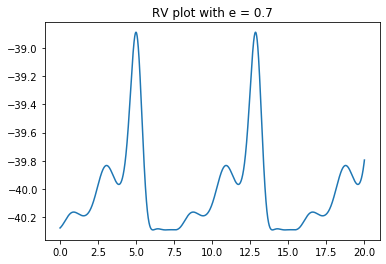

In [7]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Now I write first the function that computes the true anomaly f:
#t0 -> time of passage of periastron
#M  -> Mean anomal
#f  -> True anomaly
#e  -> Eccentricity 
def true_f(t,params):
    t0 = params[0]
    M  = params[1]
    #This line takes into account the first 4 terms of the Fourier's expansion of "f"
    f  = M + (2*(e) - (e**3)/4)*np.sin(M) + (5/4)*(e**2)*np.sin(2*M) + (13/12)*(e**3)*np.sin(3*M)
    return f

#Now I give some values for the params:
t  = np.arange(0,20,0.001)
t0 = 13 #days
M = 12*(t-t0)/T


#I write now the RV function:
#K  -> Doppler semi amplitude
#vZ -> Proper motion of the barycenter (or star's systemic velocity)
#w  -> argument of periapsis
#T  -> Orbital period

def calcula_RV(f,parametros):
    vz = parametros[0]
    K  = parametros[1]
    T  = parametros[2]
    w  = parametros[3]
    e  = parametros[4]
    vr = vz + K*(np.cos(w)*np.cos(f) - np.sin(w)*np.sin(f) + e*np.cos(w))
    return vr


#Now I give some values to all the parameters:
vz = -40 #km/s
K  = 0.7 #km/s
T  = 15   #days
w  = 0.5756  #radians (33°)
e  = 0.7

#Now I call first the function that computes the true anomaly:
f = true_f(t,[t0,M])

#Now I call the RV function:
vr = calcula_RV(f, [vz,K,T,w,e])

#Now I plot RV as a function of time
plt.plot(t,vr)
plt.title('RV plot with e = 0.7')